<center>Tobe_Analytics </center>


from IPython.display import display, HTML

text = "<h1 style='text-align:center;'>Exploring Factors Influencing Happiness:</h1><h2 style='text-align:center;'>Analysing the World Happiness Dataset</h2>"

display(HTML(text))


### Introduction 
The pursuit of happiness is a fundamental aspect of human life, and understanding the factors that influence happiness is of great importance. In this project, we delve into the fascinating world of happiness by analyzing the World Happiness Dataset. Our goal is to explore the various factors that contribute to happiness and gain insights into their impact on individuals and societies.

Through this analysis, we seek to provide valuable insights into the interplay between these factors and happiness. Our findings have the potential to contribute to a deeper understanding of well-being, inform policy-making decisions, and inspire initiatives aimed at improving happiness and quality of life worldwide

### Project Brief:
The aim of this project is to explore the factors influencing happiness across different countries and regions in honor
of World Happiness Day. We will analyze data related to variables such as Logged GDP per Capita, Social Support, Health
Life Expectancy, Freedom to Make Life Choices, Generosity, and Perception of Corruption. Through exploratory data 
analysis, we will examine the relationships between these factors and the Happiness score to gain insights and provide
recommendations for promoting happiness and well-being.

### Dataset 
Data set was gotten from Kaggle 

Below is the link:

[World Happiness Dataset](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [132]:
sns.set_style("whitegrid")
plt.rcParams["font.size"] =16
plt.rcParams["figure.figsize"] =(12, 8)
plt.rcParams["figure.facecolor"] = "#F2F2F2"

## Data Cleaning

In [58]:
# loading the CSV dataset file
data=pd.read_csv("C:/Users/TOBE CHUKS/Pictures/Data Analytics Started on 20th April 2023/Python EDA Project World Happiness Report/Dataset from Kaggle/world-happiness-report-2021.csv")

In [60]:
#Printing the first five rows
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [98]:
#Checks for duplicates 
data.duplicated().any()

False

In [61]:
#Selecting the columns of interest
data_columns= ["Country name", "Regional indicator", "Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

In [65]:
# Creating a copy of our columns of interest 
data = data[data_columns].copy()

In [106]:
#Renaming the columns for improved readability
happy_df = data.rename(columns=
    {"Country name":"country_name",
    "Regional indicator":"regional_indicator",
    "Ladder score":"happiness_score",
    "Logged GDP per capita":"logged_GDP_per_capita",
    "Social support":"social_support",
    "Healthy life expectancy":"health_life_expectancy",
    "Freedom to make life choices":"freedom_to_make_life_choices",
    "Generosity":"generosity",
    "Perceptions of corruption":"perception_of_corruption"
})

In [107]:
#Printing the top 5 rows 
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [108]:
#Checks for missing values if any
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
health_life_expectancy          0
freedom_to_make_life_choices    0
generosity                      0
perception_of_corruption        0
dtype: int64

## Exploratory Data Analysis (EDA)


### Univariate Analysis

In [412]:
# Eaxaming the top 10 happiest countries with respect to happiness score 
top_10_happiest_countries = happy_df.nlargest(10, 'happiness_score')
top_10_happiest_countries_filtered = top_10_happiest.loc[:, ['country_name', 'regional_indicator', 'happiness_score']]
print(top_10_happiest_filtered)

  country_name     regional_indicator  happiness_score
0      Finland         Western Europe            7.842
1      Denmark         Western Europe            7.620
2  Switzerland         Western Europe            7.571
3      Iceland         Western Europe            7.554
4  Netherlands         Western Europe            7.464
5       Norway         Western Europe            7.392
6       Sweden         Western Europe            7.363
7   Luxembourg         Western Europe            7.324
8  New Zealand  North America and ANZ            7.277
9      Austria         Western Europe            7.268


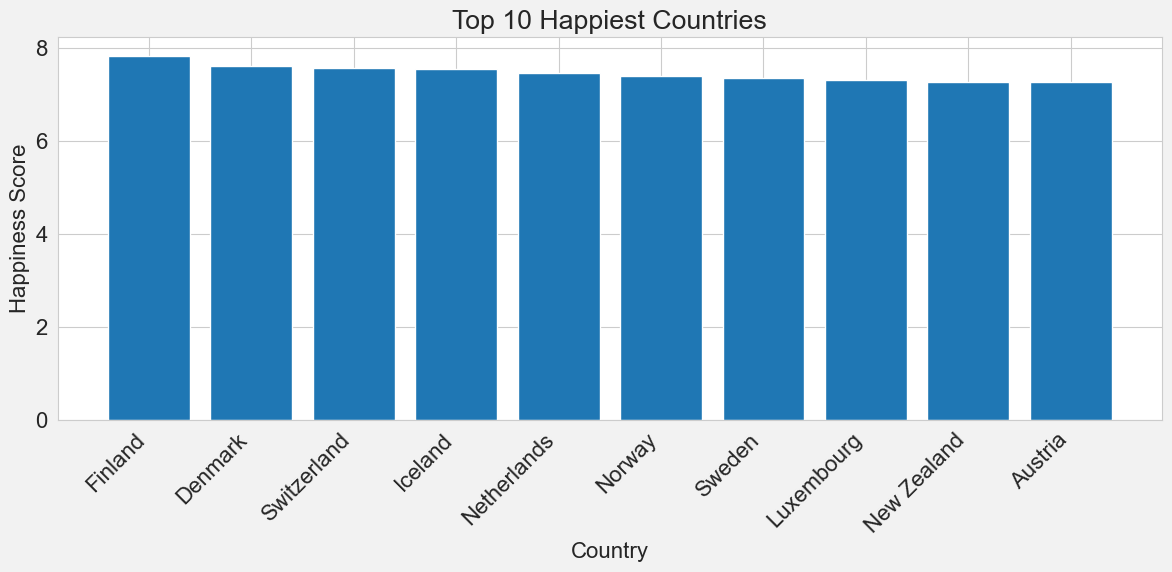

In [414]:
#Visualisation the top 10 happiest counrties 

plt.figure(figsize=(12, 6))
plt.bar(top_10_happiest['country_name'], top_10_happiest['happiness_score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Obeservation 
The bar chart shows the top 10 happiest countries, with Finland being the happiest country based on the happiness score. However, we need to further investigate how our other variables contribute to the happiness score.

### Bivariate Analysis

Text(0, 0.5, 'GDP per Capita')

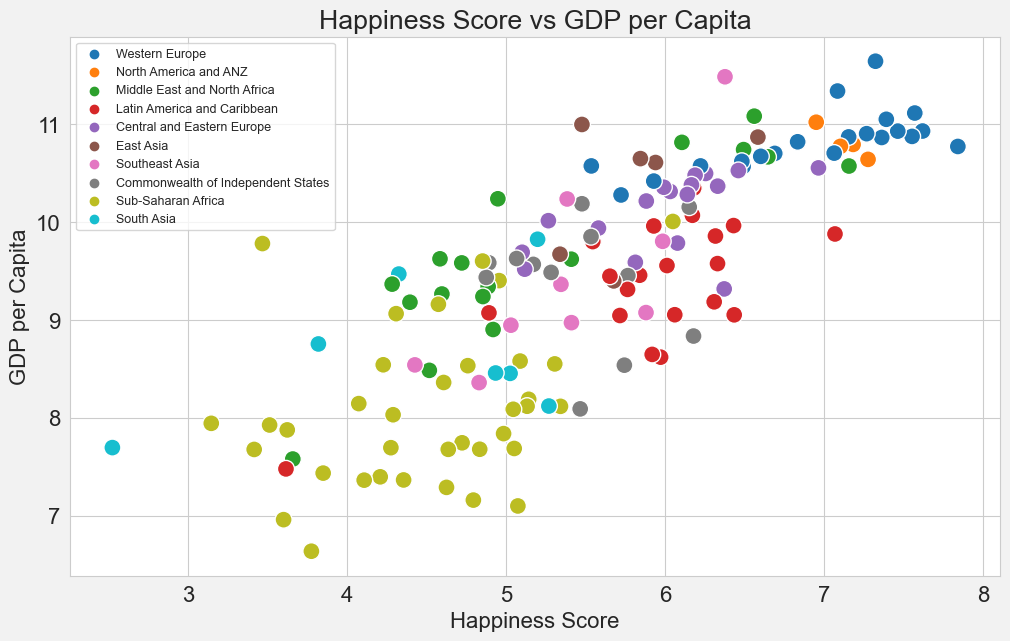

In [173]:
#Scatter plot of happines_score vs GDP per Capita
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.logged_GDP_per_capita,
                hue=happy_df.regional_indicator, s=150);

#The figure should be 12x7 inches
plt.rcParams["figure.figsize"] =(12, 7)

#Title of plot
plt.title("Happiness Score vs GDP per Capita")

#Legend should be positioned at the upper left with a font size of 10
plt.legend(loc= "upper left", fontsize="9")

#X-axis
plt.xlabel("Happiness Score")
#Y-axis
plt.ylabel("GDP per Capita")

#### Observation:
There is no significant presence of outliers in the data. 
The scatter plot reveals distinct patterns in the relationship between the happiness score and GDP per capita across different regions. Regions located in the upper right section, such as Western Europe, exhibit higher levels of both the happiness score and GDP per capita. On the other hand, regions in the lower left section, like Sub-Saharan Africa, demonstrate lower scores in both variables.

It is important to note that correlation does not imply causation. Simply increasing a region's GDP per capita does not guarantee a corresponding increase in the happiness score, and vice versa. Other unaccounted factors might influence this relationship. To gain a comprehensive understanding and account for these influencing factors, further analysis beyond the scatter plot visualization is necessary.

In [180]:
#Calculating the mean of GDP per regions
gdp_region =happy_df.groupby("regional_indicator")["logged_GDP_per_capita"].mean()

#Printing the mean of GDP per regions
print(gdp_region)

regional_indicator
Central and Eastern Europe            10.109059
Commonwealth of Independent States     9.401833
East Asia                             10.367667
Latin America and Caribbean            9.370000
Middle East and North Africa           9.666118
North America and ANZ                 10.809500
South Asia                             8.682571
Southeast Asia                         9.421444
Sub-Saharan Africa                     8.075194
Western Europe                        10.822714
Name: logged_GDP_per_capita, dtype: float64


Text(0, 0.5, ' ')

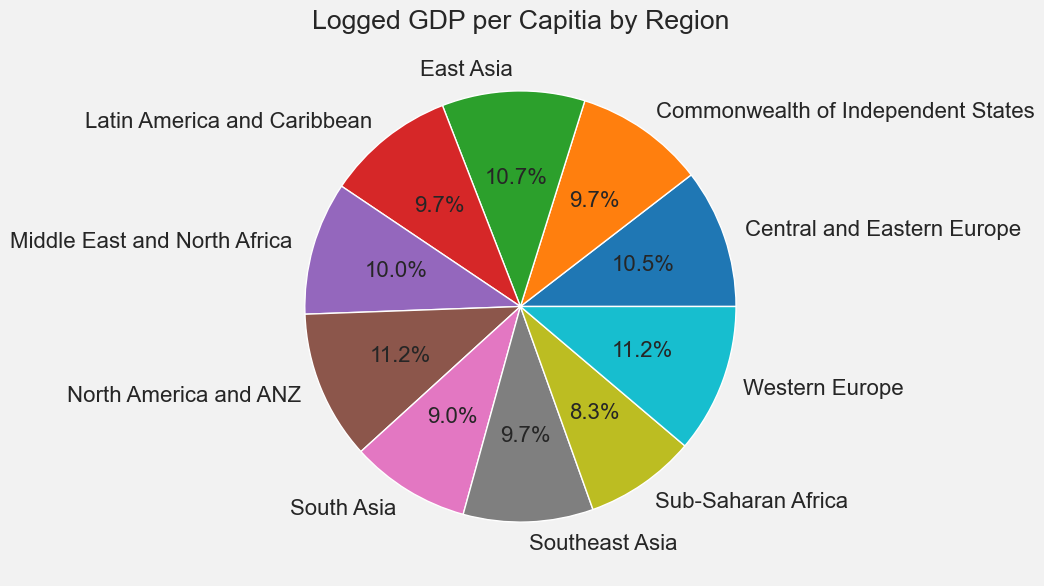

In [178]:
#Plotting the sum of GDP's per region in a Pie Chart
gdp_region.plot.pie(autopct ="%1.1f%%")
plt.title("Logged GDP per Capitia by Region")
plt.ylabel(" ")

#### Observation:
The regions of Western Europe and North America, along with ANZ (Australia, New Zealand), exhibit the highest mean
values of logged GDP per capita. This could suggests a higher level of economic output or income per person in these 
regions. On the other hand, Sub-Saharan Africa exhibits the lowest mean values of logged GDP per capita, which could 
suggest a lower level of economic output per person in that region.

It is important to note that GDP per capita is a direct measure of economic output or income per person in a specific
region or country. However, logged GDP per capita is a transformed or adjusted version of the original variable. It is
not a direct measure of economic well-being or income level like GDP per capita. Instead, it is a transformed variable 
that allows for certain statistical calculations. Therefore, further analysis is necessary to understand the 
relationship between logged GDP per capita and other factors of interest or to draw meaningful conclusions about 
economic well-being in different regions.

In [187]:
#Total countries in each region

total_country=happy_df.groupby("regional_indicator")["country_name"].count()

#Printing count of Total countries in each region
print(total_country)

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64


#### Observation
The above show the count of distribution of countries across the various regions, with Sub Saharan Africa having the most countries 

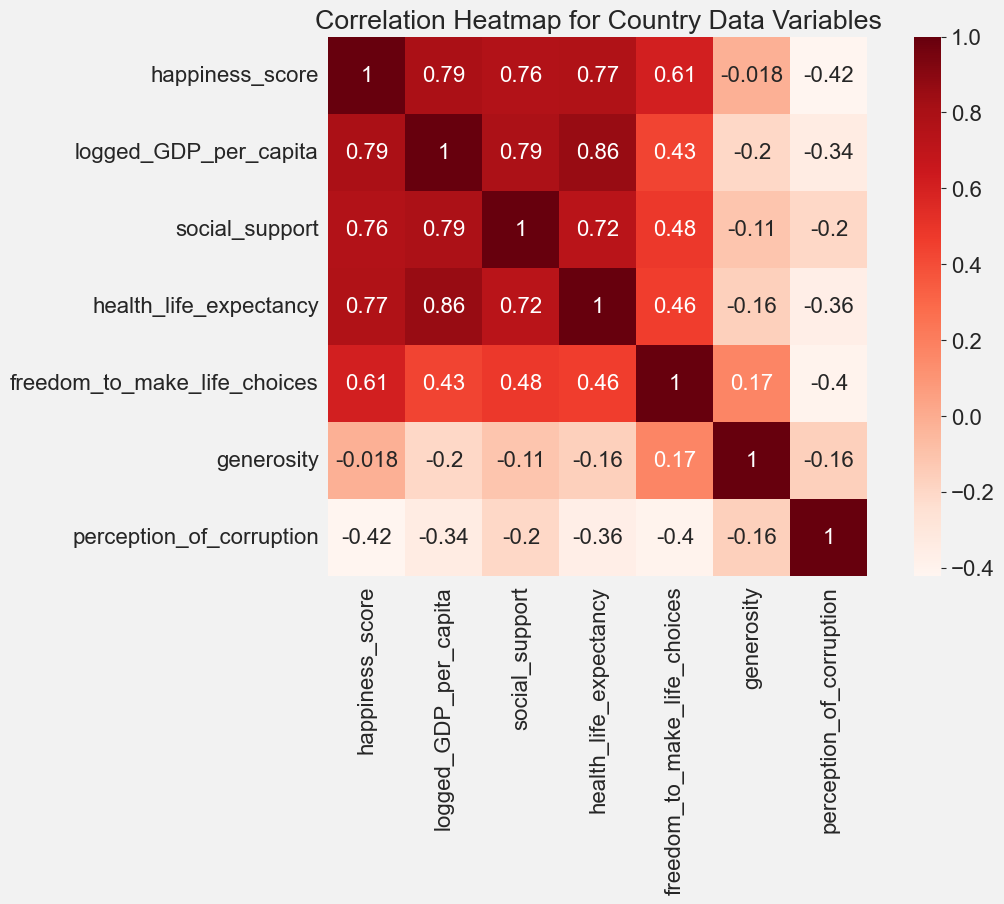

In [264]:
#Creating variable core for our correlation calucation using pearson method.
#Pearson method was used because it measures the linear relationship between two variables
cor = happy_df.corr(method="pearson")

#Heatmap to visualise correlation 
sns.heatmap(cor, cmap="Reds", square=True, annot=True)
plt.title("Correlation Heatmap for Country Data Variables")

#To clear warnings. This was done because a warning notoifcation displayed after plotting the heatmap
import warnings
warnings.filterwarnings("default")

#### Observation
The correlation heatmap provides insights into the relationship between different variables. The features with the darkest red colors indicate a direct positive relationship between two variables. For example, variables such as Logged GDP per Capita (correlation value: 0.79), Social Support (correlation value: 0.76), and Health Life Expectancy (correlation value: 0.77) all exhibit a positive correlation with the Happiness Score. This suggests that an increase in any of these variables would lead to an increase in the Happiness Score.

On the other hand, the lightest red colors in the heatmap represent an inverse relationship between variables. For instance, variables like Generosity (correlation value: -0.018) and Perception of Corruption (correlation value: -0.42) exhibit a negative correlation with the Happiness Score. This implies that an increase in these variables would lead to a decrease in the Happiness Score, and vice versa.

In [278]:
# Eaxmning the perception of corruption across various regions 

corruption= happy_df.groupby("regional_indicator")["perception_of_corruption"].mean()

#Printing Perception of Corruption acorss various regions
print(corruption)

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perception_of_corruption, dtype: float64


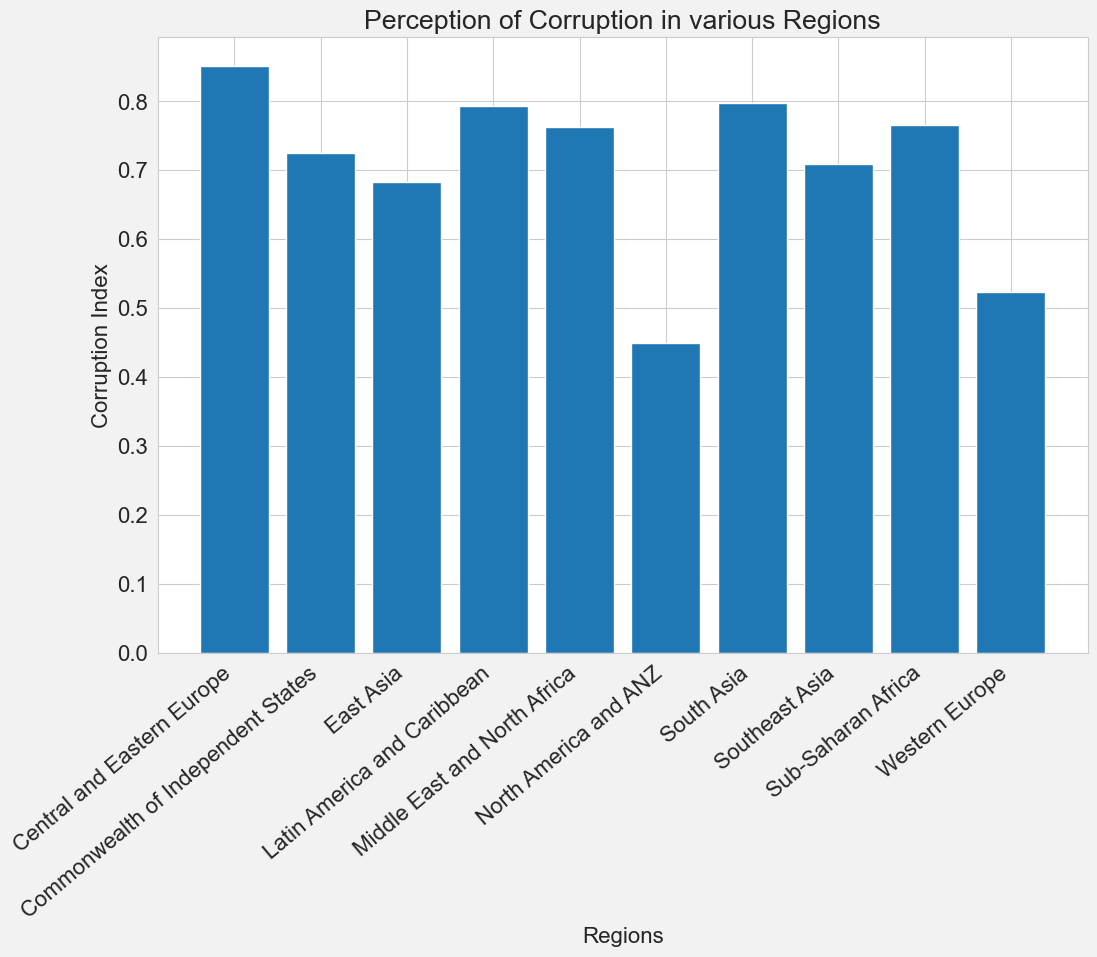

In [370]:
#Visualising perception of corruption across regions.
# It is important to note that in the code for ploting the bar chart, that is "plt.bar(corruption.index, corruption)",
# corruption.index retrives the index information of corruption data frame which are the various regions.

plt.rcParams["figure.figsize"]= (12, 8)
plt.title("Perception of Corruption in various Regions")
plt.xlabel("Regions")
plt.ylabel("Corruption Index")
plt.xticks(rotation =40, ha="right")
plt.bar(corruption.index, corruption);

#### Observation
Based on the bar chart, it can be observed that Central and Eastern Europe has the highest corruption index among the regions, while North America and ANZ (Australia and New Zealand) exhibit the lowest corruption index.

In [ ]:
# Top ten happiest countries 
top_10=happy_df.head(10)
# Last ten happiest countries 
bottom_10=happy_df.tail(10)

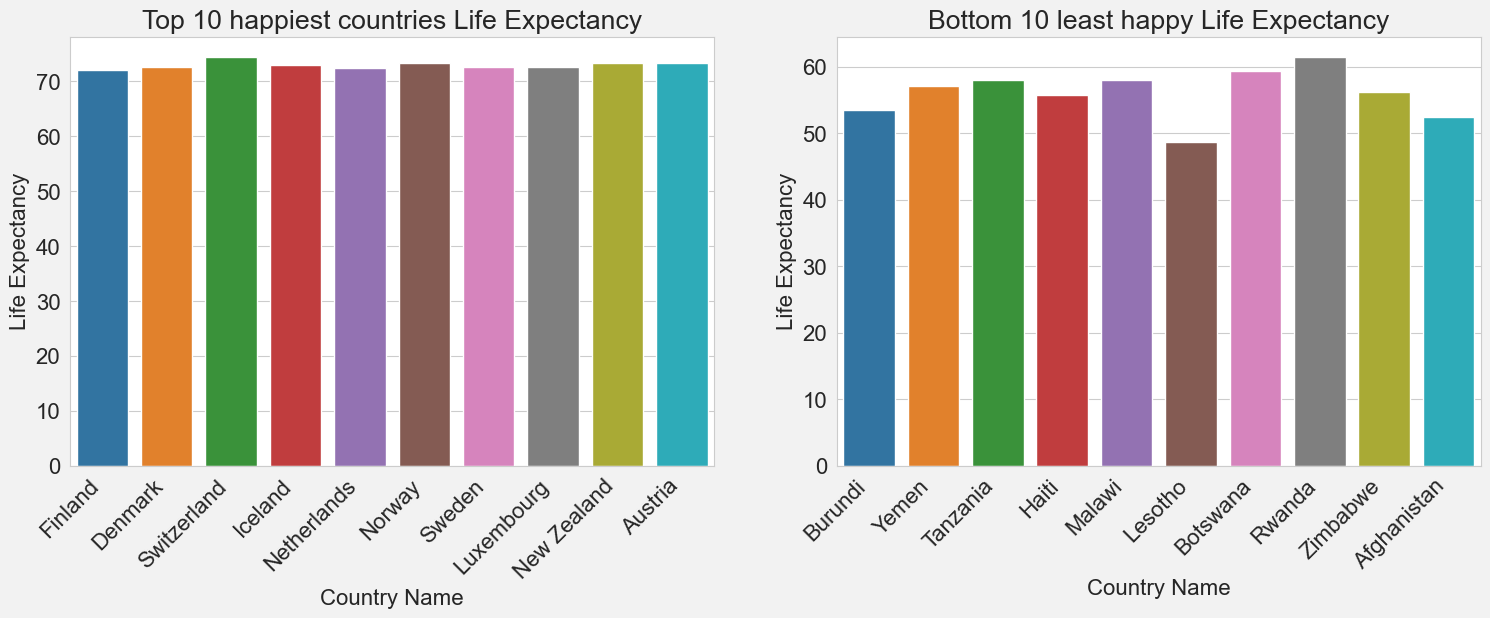

In [362]:
# Creating the plots for the Life Expectancy of the top 10 and bottom 10 happiest countries
fig, axes = plt.subplots(1, 2, figsize=(16, 6))   #creates two subplots with figsize of 16x6 inches
plt.tight_layout(pad=3)        #adjusts the spaces between the two plots so as to avoid overlap

xlabels = top_10.country_name
axes[0].set_title("Top 10 happiest countries Life Expectancy")
sns.barplot(x=top_10.country_name, y=top_10.health_life_expectancy, ax=axes[0])
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_xticklabels(xlabels, rotation=45, ha="right") # Sets the x-axis tick labels using the xlabels variable. 
                                                          # The rotation=45 argument rotates the labels by 45 degrees, 
                                                          # and ha="right" aligns them to the right

        
xlabels = bottom_10.country_name
axes[1].set_title("Bottom 10 least happy Life Expectancy") 
sns.barplot(x=bottom_10.country_name, y=bottom_10.health_life_expectancy, ax=axes[1])
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")
axes[1].set_xticklabels(xlabels, rotation=45, ha="right");  # Sets the x-axis tick labels using the xlabels variable. 
                                                          # The rotation=45 argument rotates the labels by 45 degrees, 
                                                          # and ha="right" aligns them to the right


#### Observation
Based on the bar charts, The top 10 happiest countries have a life expectany above the age of 70 as compared to bottom 10 
countries which have a life expectancy below the age of 70. This immplies that people in the top 10 happiest countries tend 
to live longer as compared to people in the bottom 10 countries 

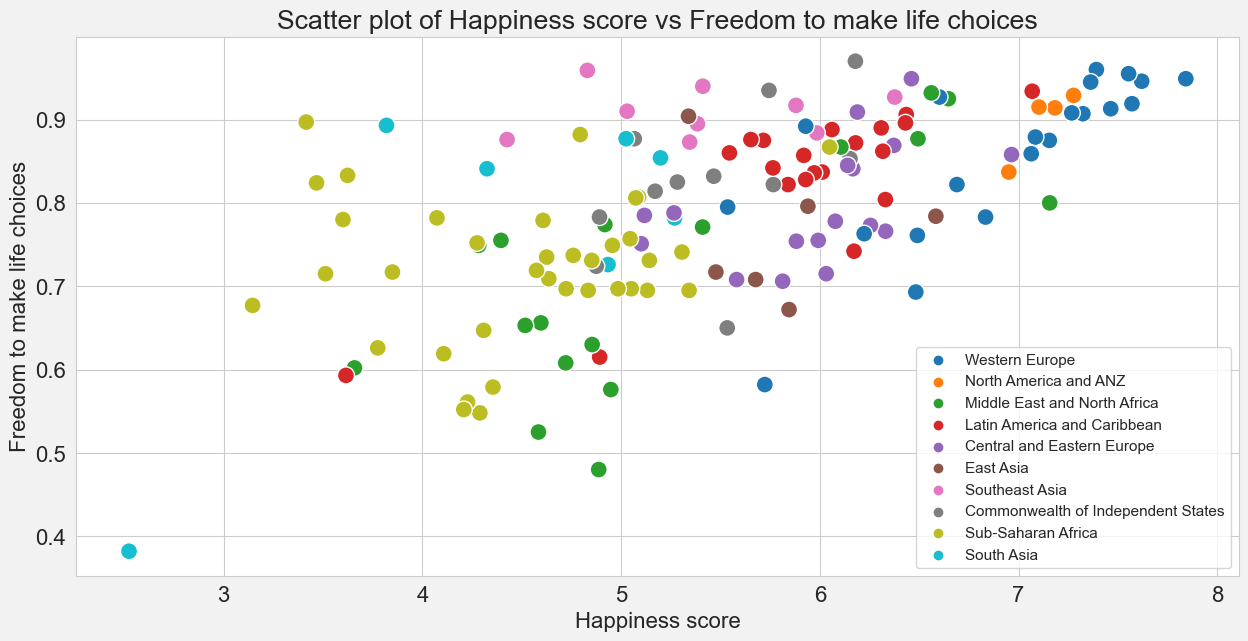

In [394]:
#Examing happiness score in regards to freedom to make life choices via scatter plot
sns.scatterplot(x=happy_df.happiness_score, 
                y=happy_df.freedom_to_make_life_choices, 
                hue=happy_df.regional_indicator, s=150)

plt.rcParams["figure.figsize"]= (15, 7)
plt.title("Scatter plot of Happiness score vs Freedom to make life choices")
plt.legend(loc="lower right", fontsize=11)
plt.xlabel("Happiness score")
plt.ylabel("Freedom to make life choices");

##### Observation
The notable outlier which can be seen is one of the data points of South Asia, which from has a lower value for freedom to make life choices and lower value for happiness score. This confirms our positive correlation coeffienct of 0.61 which we earlier derived from out correlation heat map. However this outlier would not affect our model if their is any 
need to carryout machine learning on our analysis as the outlier still lies with the notablke trend in regards to other data points. 


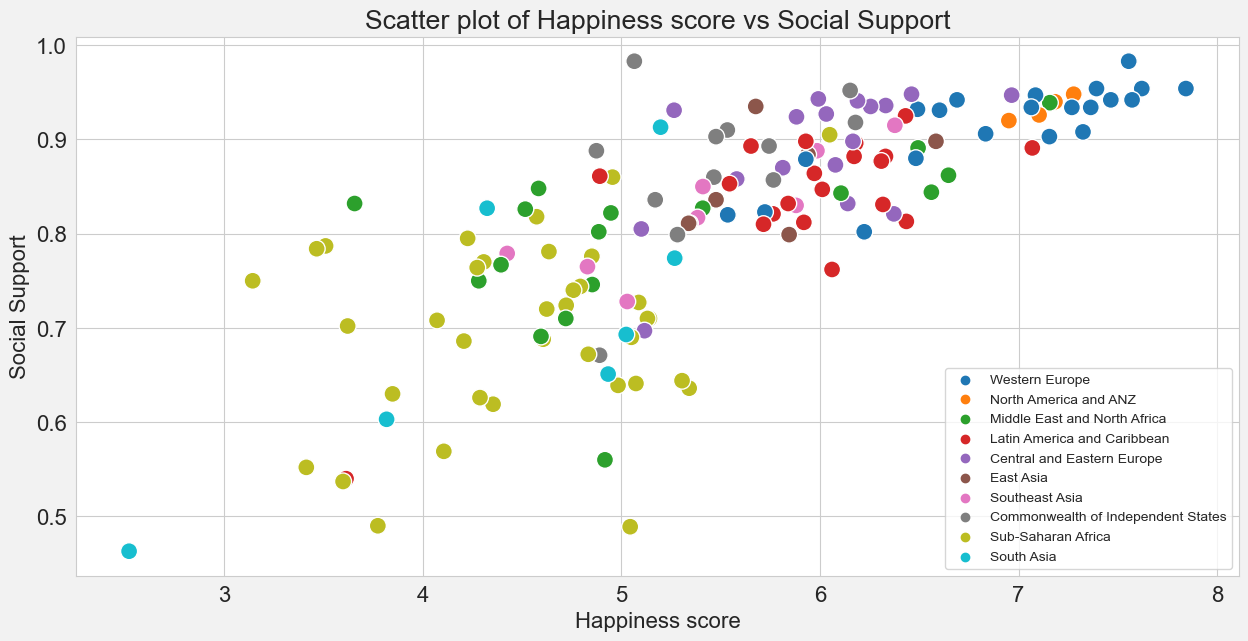

In [391]:
#Examing happiness score in regards to social support via scatter plot
sns.scatterplot(x=happy_df.happiness_score, 
                y=happy_df.social_support, 
                hue=happy_df.regional_indicator, s=150)

plt.rcParams["figure.figsize"]= (15, 7)
plt.title("Scatter plot of Happiness score vs Social Support")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("Happiness score")
plt.ylabel("Social Support");

#### Observation
Regions with higher social support experience higher happines score hence this confirms our positive correlation
cofficient of 0.76 which was derived from our correlation heat map

# Multivariate Analysis

Text(0, 0.5, 'GDP per Capita')

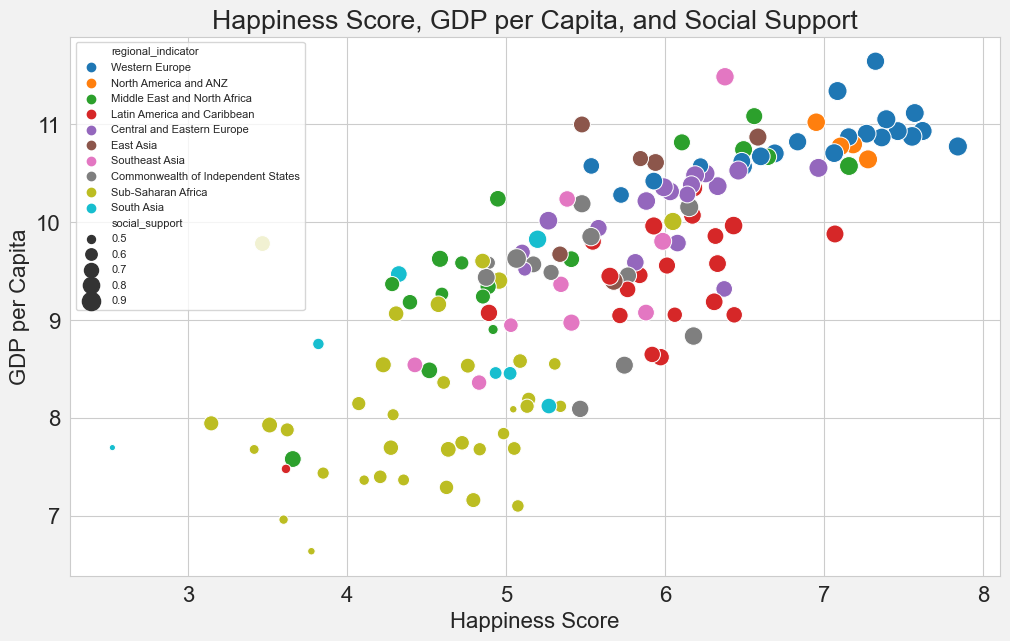

In [402]:
# Eaxming the effect of Logged GDP per capita and Social support on Hapiness scores
sns.scatterplot(x=happy_df.happiness_score,
                y=happy_df.logged_GDP_per_capita,
                hue=happy_df.regional_indicator,
                size=happy_df["social_support"],
                sizes=(20, 200))


plt.rcParams["figure.figsize"] = (12, 7)
plt.title("Happiness Score, GDP per Capita, and Social Support")
plt.legend(loc="upper left", fontsize=8)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")


#### Observation
It is important to first note that the x-axis represents happiness score, the y-axis represents GDP per Capita and 
the ball sizes of the various data points represents values for social support. Hence we can see that the scatters 
plot confrims the positive correlation coefficent values in our heatmap in which we got for GDP per Capita(0.79) and 
Social support(0.76). This therefore means that as values of GDP per Capitia increases and the ball sizes of our data
point increase which represents Social support, there is a corresponding increase in happiness score. Western Europe 
therefore has the biggest ball sizes as they also exhibit largest GDP per Capita and largest Happiness score

# Conlusion 

#### Findings

Based on our EDA analysis, we have found significant correlations between various variables and the Happiness score. The following are the correlation values for each variable with respect to the Happiness score:

* Logged GDP per Capita: 0.79 
* Social support: 0.76
* Health life expectancy: 0.77
* Freedom to make life choices: 0.61
* Generosity: -0.018
* Perception of corruption: -0.42

The correlation values obtained indicate the strength and direction of the relationship between each variable and the Happiness score. A correlation value ranges from -1 to 1, where 1 represents a strong positive correlation, -1 represents a strong negative correlation, and 0 represents no correlation.

A positive correlation suggests that an increase in the correlated independent variable tends to be associated with an increase in the dependent variable Happiness score, while a negative correlation suggests that an increase in the correlated variable tends to be associated with a decrease in the Happiness score.

#### Insights 

Economic factors matter: The logged GDP per Capita, social support, and health life expectancy have strong positive correlations with the Happiness score. This indicates that countries with higher economic output, better social support systems, and longer life expectancy tend to have higher levels of happiness.

Freedom plays a role: The freedom to make life choices also shows a positive correlation with the Happiness score, although slightly weaker. This suggests that countries that provide individuals with more personal freedom tend to have higher levels of happiness.

Generosity and corruption have weaker impacts: The variables of generosity and perception of corruption show relatively weaker correlations with the Happiness score. Generosity has a near-zero correlation, indicating that it has minimal direct influence on happiness. On the other hand, a higher perception of corruption is negatively correlated with happiness, implying that countries with lower levels of corruption tend to have happier populations.

#### Recommendations

Focus on economic development: Governments should prioritize initiatives aimed at improving GDP per Capita, as it has a significant positive impact on happiness. This can be achieved through policies that promote economic growth, job creation, and income equality.

Enhance social support systems: Building robust social support systems, such as healthcare, education, and social welfare programs, can contribute to higher levels of happiness. Governments should invest in these areas to ensure the well-being and support of their citizens.


<center>Tobe_Analytics </center>
